   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
Missing values:
 sepal_length    0
sepal_width

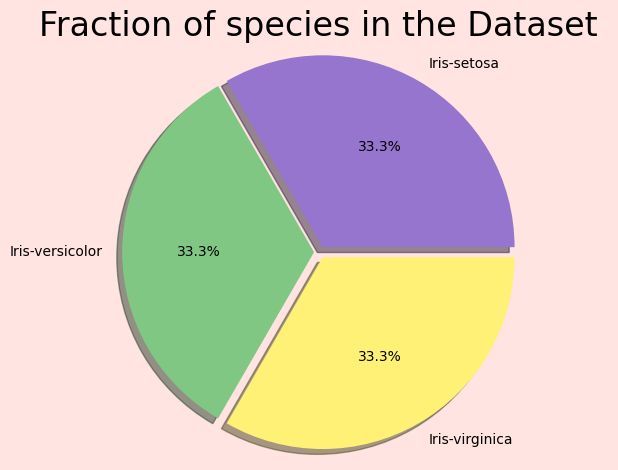

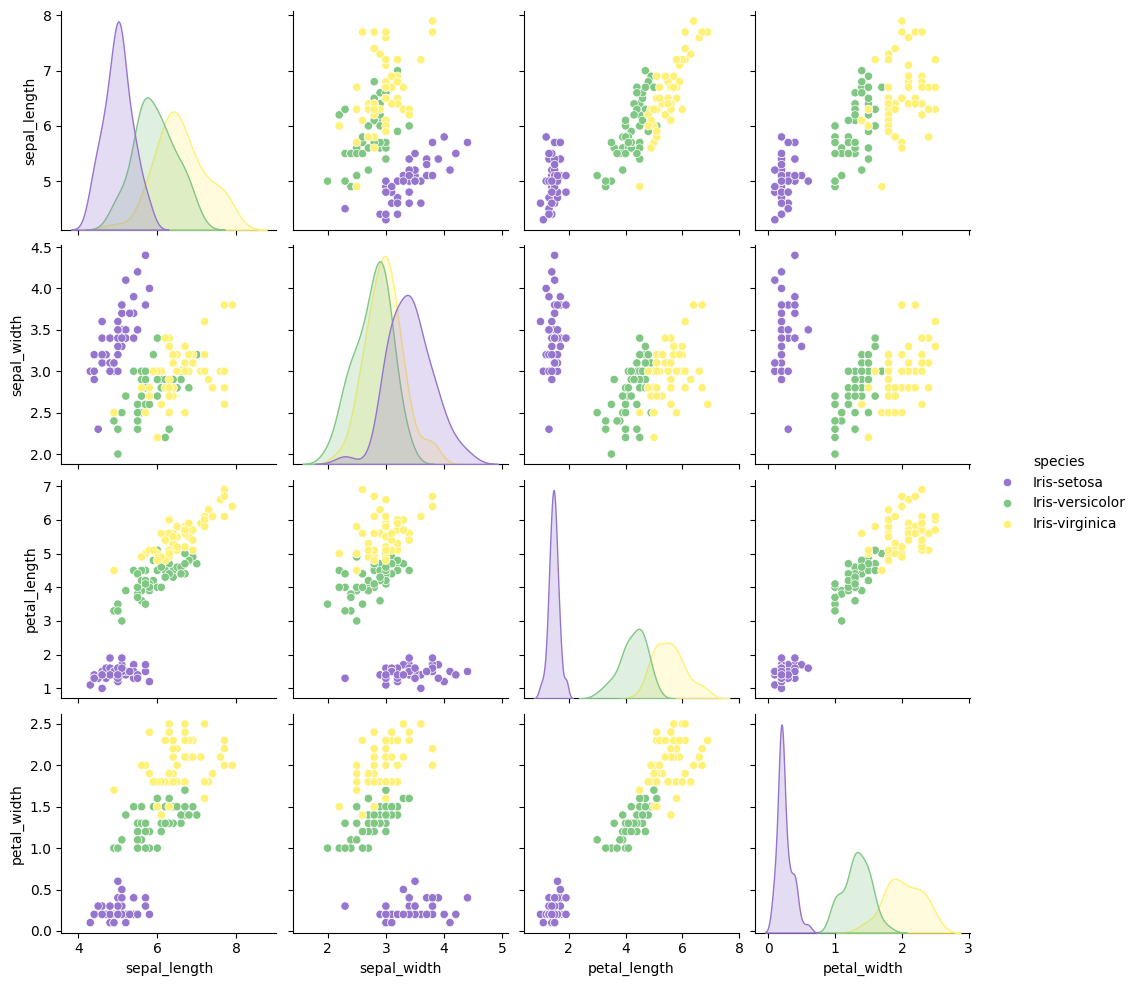

<ipython-input-11-bf7bdf3b1dca>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[target_column], y=data[column], ax=axes[i], palette=colors)
<ipython-input-11-bf7bdf3b1dca>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[target_column], y=data[column], ax=axes[i], palette=colors)
<ipython-input-11-bf7bdf3b1dca>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[target_column], y=data[column], ax=axes[i], palette=colors)
<ipython-input-11-bf7bdf3b1dca>:47: FutureWarning: 

Passing `palette` without assigning `hue` is de

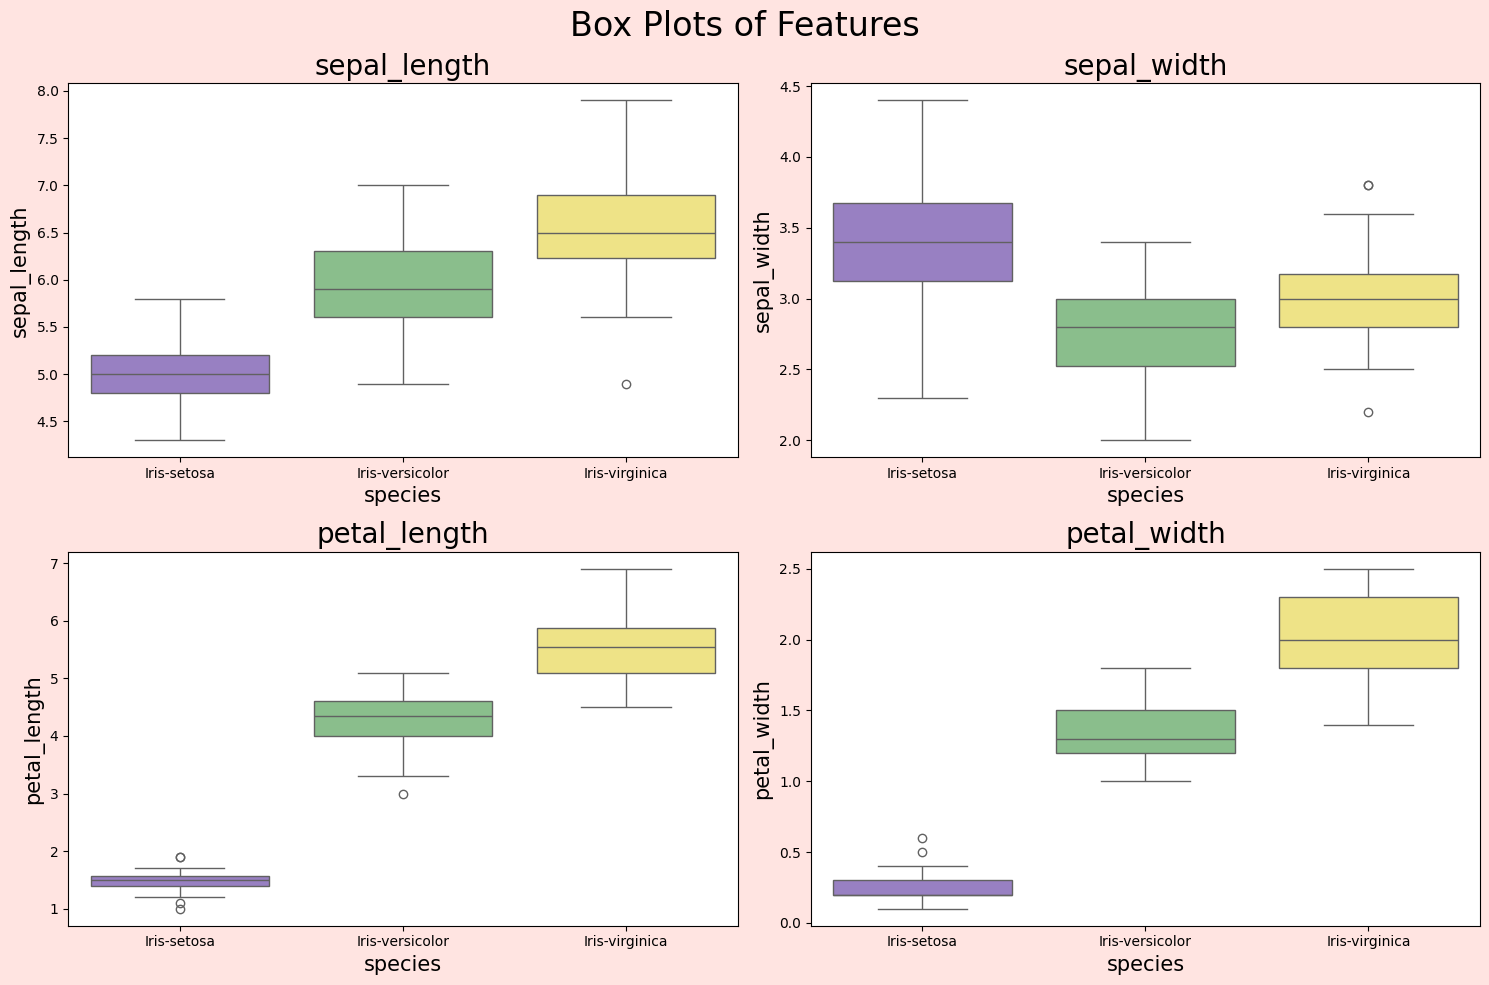

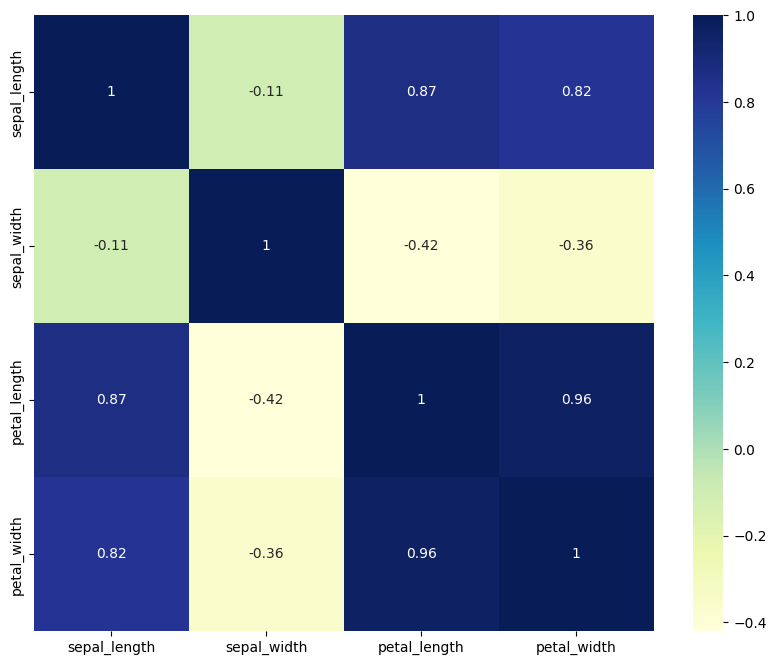

Accuracy: 1.00
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



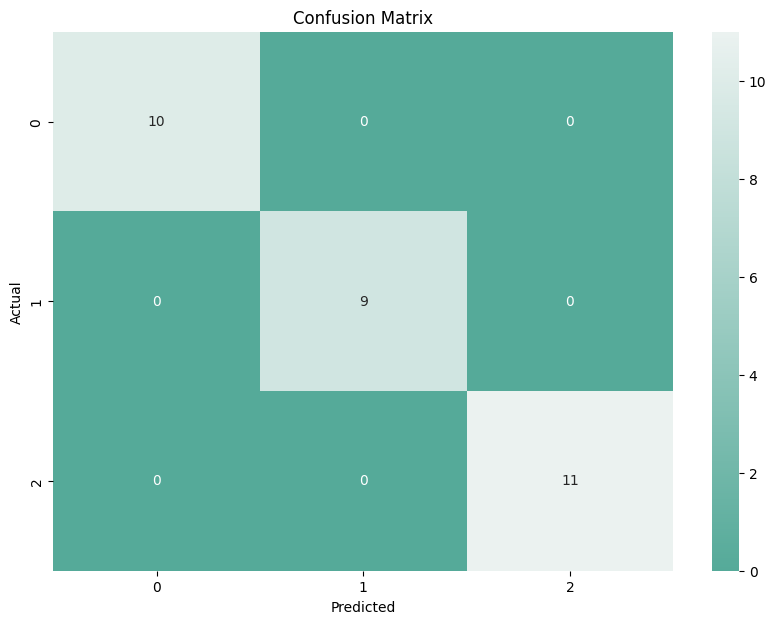

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the dataset
file_path = '/content/IRIS.csv'  # Update the file path as needed
data = pd.read_csv(file_path)

# Displaying a few rows of the dataset
print(data.head())

# Summary statistics
print(data.describe())
print("Missing values:\n", data.isna().sum())
print("Duplicate entries:\n", data.duplicated().sum())

# Identifying the target column (assuming it's the last column)
target_column = data.columns[-1]

# Define custom colors (slightly darker)
colors = ['#9575cd', '#81c784', '#fff176']
sns.set_palette(colors)

# Distribution of target variable
val = data[target_column].value_counts()
plt.pie(val, labels=val.index, autopct="%1.1f%%", shadow=True, explode=(0.03, 0.03, 0.03), colors=colors)
plt.axis('equal')
plt.title(f'Fraction of {target_column} in the Dataset', fontsize=24)
plt.tight_layout()
plt.gcf().patch.set_facecolor('mistyrose')
plt.show()

# Pairplot to visualize relationships (only if there are fewer than 10 features)
if len(data.columns) <= 10:
    sns.pairplot(data, hue=target_column, palette=colors)
    plt.show()

# Box plots to visualize feature distributions by target
fig, axes = plt.subplots(nrows=(len(data.columns) - 1) // 2, ncols=2, figsize=(15, 5 * ((len(data.columns) - 1) // 2)))
axes = axes.flatten()
for i, column in enumerate(data.columns[:-1]):
    sns.boxplot(x=data[target_column], y=data[column], ax=axes[i], palette=colors)
    axes[i].set_title(column, fontsize=20)
    axes[i].set_xlabel(target_column, fontsize=15)
    axes[i].set_ylabel(column, fontsize=15)

fig.suptitle("Box Plots of Features", fontsize=24)
fig.set_facecolor('mistyrose')
plt.tight_layout()
plt.show()

# Heatmap to show correlation
plt.figure(figsize=(10, 8))
data1 = data.drop('species', axis=1)
sns.heatmap(data1.corr(), annot=True, cmap='YlGnBu')
plt.show()

# Define features and target
X = data.drop(target_column, axis=1)
y = data[target_column]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=sns.color_palette("light:#5A9_r", as_cmap=True))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
